In [2]:
# Importando bibliotecas necessárias 
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [6]:
# Carregar o conjunto de dados
iris = load_iris()
X = iris.data[:, :2]  # Usando apenas as duas primeiras características: comprimento e largura da sépala
y = iris.target

In [7]:
# Dividir os Dados em Conjuntos de Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Padronizar os Dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Lista com diferentes percentuais de dados para treinamento
train_sizes = [0.1, 0.2, 0.3, 0.4]

In [14]:
# Criar uma lista para armazenar os resultados
results = []

for train_size in train_sizes:
    # Dividir os dados em conjuntos de treinamento e teste novamente com o tamanho especificado
    X_train_size, X_test_size, y_train_size, y_test_size = train_test_split(X_train_scaled, y_train, test_size=1-train_size, random_state=42)
    
    for n in range(1, 10):
        # Criar e treinar o modelo KNN
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_size, y_train_size)  # Use a parte escalada

        # Avaliar o modelo
        accuracy = knn.score(X_test_size, y_test_size)  # Use a parte escalada
        
        # Armazenar os resultados
        results.append({'%': train_size * 100,
                        'k': n,
                        'accuracy': accuracy})

# Converter os resultados em um DataFrame do Pandas
results_df = pd.DataFrame(results)

# Criar uma tabela pivot onde n_neighbors é o eixo X e train_sizes é o eixo Y
pivot_table = results_df.pivot(index='%', columns='k', values='accuracy')

# Exibir a tabela resultante
print(pivot_table)

k            1         2         3         4         5         6         7  \
%                                                                            
10.0  0.712963  0.694444  0.712963  0.648148  0.722222  0.657407  0.629630   
20.0  0.739583  0.697917  0.718750  0.708333  0.739583  0.729167  0.729167   
30.0  0.690476  0.666667  0.666667  0.678571  0.714286  0.678571  0.761905   
40.0  0.722222  0.680556  0.680556  0.680556  0.736111  0.722222  0.736111   

k            8         9  
%                         
10.0  0.657407  0.601852  
20.0  0.718750  0.729167  
30.0  0.678571  0.738095  
40.0  0.736111  0.791667  


In [17]:
# Convertendo os índices para valores numéricos para usar como pesos e transformando em um array NumPy
weights = np.array(pivot_table.index.astype(float) / 100)  # Remover '%' diretamente convertendo para float

# Calculando a média ponderada usando weights como um array NumPy
weighted_average = (pivot_table.values * weights[:, None]).sum(axis=0) / weights.sum()

# Convertendo o resultado em um DataFrame para melhor visualização
weighted_average_df = pd.DataFrame(weighted_average, index=pivot_table.columns, columns=['Média Ponderada'])

print(weighted_average_df)

   Média Ponderada
k                 
1         0.715245
2         0.681250
3         0.687269
4         0.682275
5         0.728869
6         0.704034
7         0.731812
8         0.707507
9         0.744114


In [22]:
from sklearn.metrics import recall_score

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Agora y_true são os valores reais do conjunto de teste
y_true = y_test

# Calcular o Recall ponderado usando sklearn
recall_ponderado = recall_score(y_true, y_pred, average='weighted')
print(f'Recall Ponderado (usando sklearn): {recall_ponderado:.4f}')

# Agora vamos calcular o Recall ponderado com os dados gerados da tabela
# Aqui assumimos que você já tem y_true e y_pred (os rótulos verdadeiros e preditos)

# Exemplo de uso do recall_score com média ponderada
recall_ponderado = recall_score(y_true, y_pred, average='weighted')
print(f'Recall Ponderado (usando sklearn): {recall_ponderado:.4f}')

Recall Ponderado (usando sklearn): 0.3667
Recall Ponderado (usando sklearn): 0.3667


In [24]:
from sklearn.metrics import f1_score

# Calcular o F1-Score ponderado usando sklearn
f1_ponderado = f1_score(y_true, y_pred, average='weighted')
print(f'F1-Score Ponderado (usando sklearn): {f1_ponderado:.4f}')

F1-Score Ponderado (usando sklearn): 0.1967


Matriz de Confusão:
[[ 0  0 10]
 [ 0  0  9]
 [ 0  0 11]]


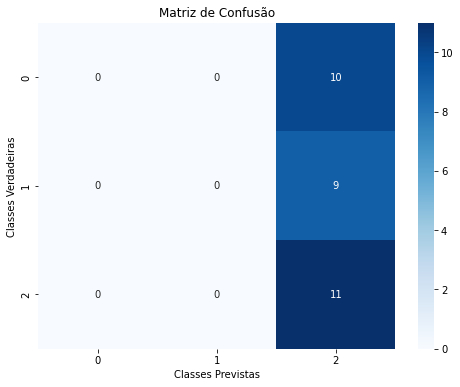

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_true, y_pred)
print("Matriz de Confusão:")
print(matriz_confusao)

# Plotar a matriz de confusão usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Classes Previstas')
plt.ylabel('Classes Verdadeiras')
plt.title('Matriz de Confusão')
plt.show()